## Flipkart Reviews Sentiment Analysis using Python

Installing word cloud

In [1]:
pip install wordcloud

Importing Libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


Installing nltk

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


Importing nltk

In [4]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hir1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Downloading 'punkt' from nltk

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hir1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Importing and viewing the dataset

In [6]:
data = pd.read_csv(r'C:\Users\hir1\Documents\coursera\Projects\Flipkart Reviews Sentiment Analysis using Python - NLP\Base Data\flipkart_data.csv') 
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


Preprocessing and cleaning the reviews

In [7]:
# unique ratings 
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

Let’s see the countplot for the same.

<Axes: xlabel='rating', ylabel='count'>

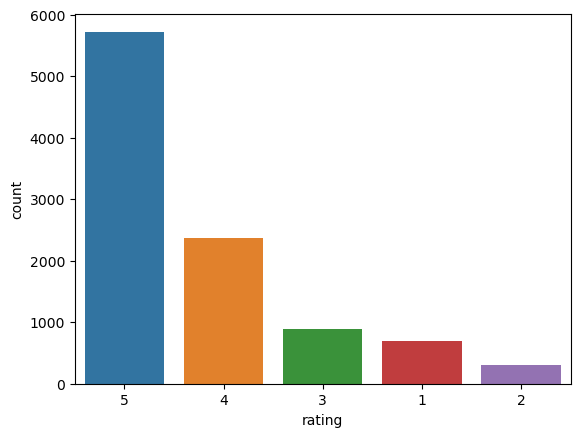

In [8]:
sns.countplot(data=data, 
            x='rating', 
            order=data.rating.value_counts().index)


To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1st category. For that the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1).

In [9]:
# rating label(final) 
pos_neg = [] 
for i in range(len(data['rating'])): 
    if data['rating'][i] >= 5: 
        pos_neg.append(1) 
    else: 
        pos_neg.append(0) 

data['label'] = pos_neg 


creating the function to preprocess the dataset

In [10]:
from tqdm import tqdm 


def preprocess_text(text_data): 
    preprocessed_text = [] 

    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 

        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() 
                                        for token in nltk.word_tokenize(sentence) 
                                        if token.lower() not in stopwords.words('english'))) 

    return preprocessed_text 


Now, we can implement this function for the dataset.

In [11]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review


100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [01:28<00:00, 112.38it/s]


Once we have done with the preprocess. Let’s see the top 5 rows to see the improved dataset.

In [12]:
data.head()


,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


 Analysis of the Dataset

Checking out how many counts are there for positive and negative sentiments.

In [13]:
data["label"].value_counts()


label
1    5726
0    4250
Name: count, dtype: int64

To have the better picture of the importance of the words let’s create the Wordcloud of all the words with label = 1 i.e. positive

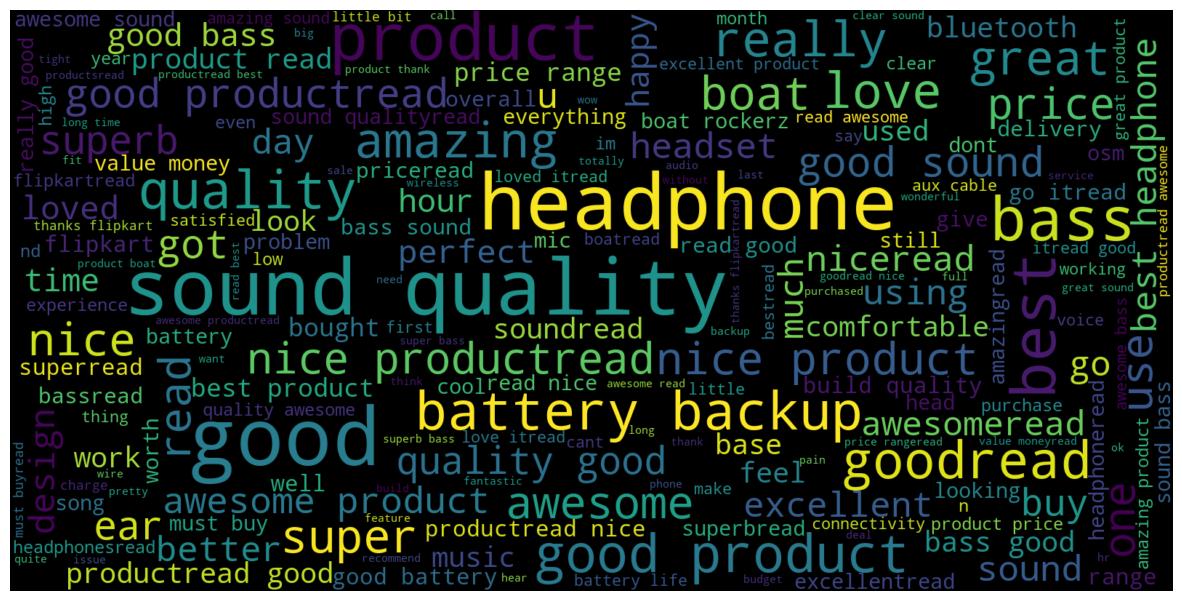

In [14]:
consolidated = ' '.join( 
    word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                    random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


Converting text into Vectors

In [15]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()


Printing the X generated

In [16]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Model training, Evaluation, and Prediction

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
                                                    test_size=0.33, 
                                                    stratify=data['label'], 
                                                    random_state = 42)


Importing Required packages and metrics

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Now we can train any model, Let’s explore the Decision Tree for the prediction.

In [19]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))


0.9247344007182403


Let’s see the confusion matrix for the results.

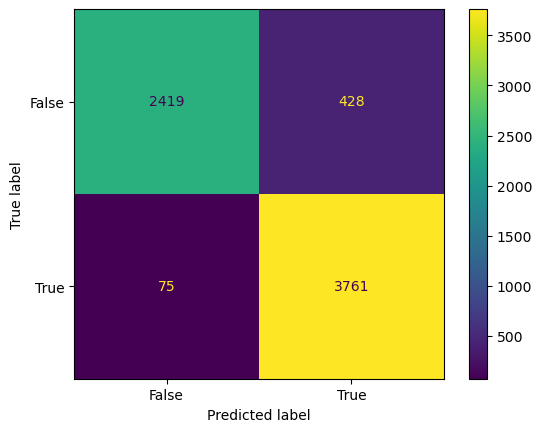

In [20]:
from sklearn import metrics 
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True]) 

cm_display.plot() 
plt.show()


Decision Tree Classifier is performing well with this data. In future, we can also work with large data by scraping it through the website.